# 一、聚类

### 1.1  K-means

**K-均值**是最普及的聚类算法，算法接受一个未标记的数据集，然后将数据聚类成不同的组

**K-均值**是一个迭代算法，假设我们想要将数据聚类成n个组，其方法为:

首先选择$K$个随机的点，称为**聚类中心**（**cluster centroids**）

对于数据集中的每一个数据，按照距离$K$个中心点的距离，将其与距离最近的中心点关联起来，与同一个中心点关联的所有点聚成一类。

计算每一个组的平均值，将该组所关联的中心点移动到**平均值的位置**

用$μ^1$,$μ^2$,...,$μ^k$ 来表示聚类中心，用$c^{(1)}$,$c^{(2)}$,...,$c^{(m)}$来存储与第$i$个实例数据最近的聚类中心的索引，**K-均值**算法的伪代码如下：

```python
Repeat {
	# Assign points to cluster centroids
	for i = 1 to m
		c(i) := index (form 1 to K) of cluster centroid closest to x(i)
	# Move cluster centroids
	for k = 1 to K
		μk := average (mean) of points assigned to cluster k
}
```

**K-均值**算法也可以很便利地用于将数据分为许多不同组，即使在没有非常明显区分的组群的情况下也可以

K-均值最小化问题，是要最小化所有的数据点与其所关联的聚类中心点之间的距离之和，因此

K-均值的代价函数（又称**畸变函数** **Distortion function**）为：


$$
J(c^{(1)},...,c^{(m)},μ_1,...,μ_K)=\dfrac {1}{m}\sum^{m}_{i=1}\left\| X^{\left( i\right) }-\mu_{c^{(i)}}\right\| ^{2}
$$
其中${{\mu }_{{{c}^{(i)}}}}$代表与${{x}^{(i)}}$最近的聚类中心点。
我们的的优化目标便是找出使得代价函数最小的 $c^{(1)}$,$c^{(2)}$,...,$c^{(m)}$和$μ^1$,$μ^2$,...,$μ^k$：

回顾上述伪代码：第一个循环是用于减小$c^{(i)}$引起的代价，而第二个循环则是用于减小${{\mu }_{i}}$引起的代价。迭代的过程一定会是每一次迭代都在减小代价函数，不然便是出现了错误

### 1.2 随机初始化

在运行K-均值算法的之前，我们首先要随机初始化所有的聚类中心点，下面介绍怎样做：

1. 我们应该选择$K<m$，即聚类中心点的个数要小于所有训练集实例的数量

2. 随机选择$K$个训练实例，然后令$K$个聚类中心分别与这$K$个训练实例相等

**K-均值**的一个问题在于，它有可能会停留在一个局部最小值处，而这取决于初始的起点位置

<center> <img src="images/p039.png" width="700" height="450"/> </center>

为了解决这个问题，我们通常需要多次运行**K-均值**算法，每一次都重新进行随机初始化，最后再比较多次运行**K-均值**的结果，选择所有这些运行结果中代价函数最小的结果（一般运行50-1000次比较合适）。这种方法在$K$较小的时候（2--10）还是可行的，但是如果$K$较大，这么做也可能不会有明显地改善。

### 1.3 选择聚类数

“肘部法则”，我们所需要做的是改变$K$值，也就是聚类类别数目的总数。我们用一个聚类来运行**K均值**聚类方法。这就意味着，所有的数据都会分到一个聚类里，然后计算成本函数或者计算畸变函数$J$。$K$代表聚类数字。

<center> <img src="images/p038.png" width="700" height="450"/> </center>

“肘部”的畸变值会迅速下降，从1到2，从2到3之后，你会在3的时候达到一个肘点。在此之后，畸变值就下降的非常慢，看起来就像使用3个聚类来进行聚类是正确的，这是因为那个点是曲线的肘点，畸变值下降得很快，$K=3$之后就下降得很慢，那么我们就选$K=3$。当你应用“肘部法则”的时候，如果你得到了一个像上面这样的图，那么这将是一种用来选择聚类个数的合理方法

#### 聚类参考资料：

1.相似度/距离计算方法总结

(1). 闵可夫斯基距离**Minkowski**/（其中欧式距离：$p=2$) 

$dist(X,Y)={{\left( {{\sum\limits_{i=1}^{n}{\left| {{x}_{i}}-{{y}_{i}} \right|}}^{p}} \right)}^{\frac{1}{p}}}$

(2). 杰卡德相似系数(**Jaccard**)：

$J(A,B)=\frac{\left| A\cap B \right|}{\left|A\cup B \right|}$

(3). 余弦相似度(**cosine similarity**)：

$n$维向量$x$和$y$的夹角记做$\theta$，根据余弦定理，其余弦值为：

$cos (\theta )=\frac{{{x}^{T}}y}{\left|x \right|\cdot \left| y \right|}=\frac{\sum\limits_{i=1}^{n}{{{x}_{i}}{{y}_{i}}}}{\sqrt{\sum\limits_{i=1}^{n}{{{x}_{i}}^{2}}}\sqrt{\sum\limits_{i=1}^{n}{{{y}_{i}}^{2}}}}$
(4). Pearson皮尔逊相关系数：
${{\rho }_{XY}}=\frac{\operatorname{cov}(X,Y)}{{{\sigma }_{X}}{{\sigma }_{Y}}}=\frac{E[(X-{{\mu }_{X}})(Y-{{\mu }_{Y}})]}{{{\sigma }_{X}}{{\sigma }_{Y}}}=\frac{\sum\limits_{i=1}^{n}{(x-{{\mu }_{X}})(y-{{\mu }_{Y}})}}{\sqrt{\sum\limits_{i=1}^{n}{{{(x-{{\mu }_{X}})}^{2}}}}\sqrt{\sum\limits_{i=1}^{n}{{{(y-{{\mu }_{Y}})}^{2}}}}}$

Pearson相关系数即将$x$、$y$坐标向量各自平移到原点后的夹角余弦



#### 聚类的衡量指标

(1). 均一性：$p$

类似于精确率，一个簇中只包含一个类别的样本，则满足均一性。其实也可以认为就是正确率(每个 聚簇中正确分类的样本数占该聚簇总样本数的比例和)

(2). 完整性：$r$

类似于召回率，同类别样本被归类到相同簇中，则满足完整性;每个聚簇中正确分类的样本数占该 
类型的总样本数比例的和

(3). **V-measure**:

均一性和完整性的加权平均 

$V = \frac{(1+\beta^2)*pr}{\beta^2*p+r}$

(4). 轮廓系数

样本$i$的轮廓系数：$s(i)$

簇内不相似度:计算样本$i$到同簇其它样本的平均距离为$a(i)$，应尽可能小。

簇间不相似度:计算样本$i$到其它簇$C_j$的所有样本的平均距离$b_{ij}$，应尽可能大。

轮廓系数：$s(i)$值越接近1表示样本$i$聚类越合理，越接近-1，表示样本$i$应该分类到 另外的簇中，近似为0，表示样本$i$应该在边界上;所有样本的$s(i)$的均值被成为聚类结果的轮廓系数。 

$s(i) = \frac{b(i)-a(i)}{max\{a(i),b(i)\}}$

(5). **ARI**

数据集$S$共有$N$个元素，  两个聚类结果分别是：

$X=\{{{X}_{1}},{{X}_{2}},...,{{X}_{r}}\},Y=\{{{Y}_{1}},{{Y}_{2}},...,{{Y}_{s}}\}$

$X$和$Y$的元素个数为：

$a=\{{{a}_{1}},{{a}_{2}},...,{{a}_{r}}\},b=\{{{b}_{1}},{{b}_{2}},...,{{b}_{s}}\}$

![ri1](images/Ari11.png)

记：${{n}_{ij}}=\left| {{X}_{i}}\cap {{Y}_{i}} \right|$

$ARI=\frac{\sum\limits_{i,j}{C_{{{n}_{ij}}}^{2}}-\left[ \left( \sum\limits_{i}{C_{{{a}_{i}}}^{2}} \right)\cdot \left( \sum\limits_{i}{C_{{{b}_{i}}}^{2}} \right) \right]/C_{n}^{2}}{\frac{1}{2}\left[ \left( \sum\limits_{i}{C_{{{a}_{i}}}^{2}} \right)+\left( \sum\limits_{i}{C_{{{b}_{i}}}^{2}} \right) \right]-\left[ \left( \sum\limits_{i}{C_{{{a}_{i}}}^{2}} \right)\cdot \left( \sum\limits_{i}{C_{{{b}_{i}}}^{2}} \right) \right]/C_{n}^{2}}$

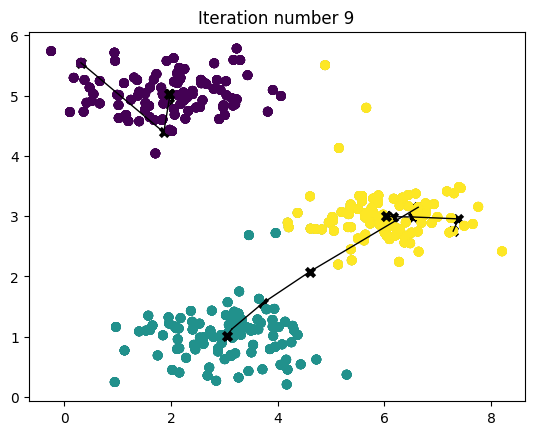

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
from scipy.io import loadmat
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from utils import *
#plt.style.use('data/deeplearning.mplstyle')
# 聚类归类
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx
# 计算聚类中心
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    return centroids
# 生成随机起点
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    return centroids
# 运行函数
# def run_k_means(X, initial_centroids, max_iters):
#     m, n = X.shape
#     k = initial_centroids.shape[0]
#     idx = np.zeros(m)
#     centroids = initial_centroids
#     for i in range(max_iters):
#         idx = find_closest_centroids(X, centroids)
#         centroids = compute_centroids(X, idx, k)
#     return idx, centroids
def run_k_means(X, initial_centroids, max_iters=10, plot_progress=False):
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return idx,centroids

data = loadmat('data/ex7data2.mat')
X = data['X']
initial_centroids = init_centroids(X, 3)  #随机起点
max_iters = 10 # 最大迭代次数
idx = find_closest_centroids(X, initial_centroids)
idx[0:3]
data2 = pd.DataFrame(data.get('X'), columns=['X1', 'X2'])
idx, centroids = run_k_means(X, initial_centroids, max_iters, plot_progress=True)

> 将K-means应用于图像压缩——用聚类来找到最具代表性的少数颜色，并使用聚类分配将原始的24位颜色映射到较低维的颜色空间

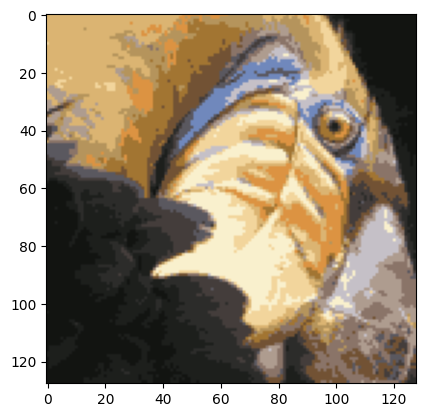

In [2]:
Image(filename='data/bird_small.png')
image_data = loadmat('data/bird_small.mat')
A = image_data['A']  # A.shape
# 规范化256位颜色
A = A / 255.
# 重新排列   (128, 128, 3) 变为 (16384, 3) 
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
initial_centroids = init_centroids(X, 16) # 随机初始
idx, centroids = run_k_means(X, initial_centroids, 10)  # 运行
idx = find_closest_centroids(X, centroids) # 归类
X_recovered = centroids[idx.astype(int),:] # 映射
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2])) #重新排列  (16384, 3) 变回 (128, 128, 3)
plt.imshow(X_recovered)
plt.show()

> 用sklearn实现K-means图像压缩

(16, 3)
(16384,)


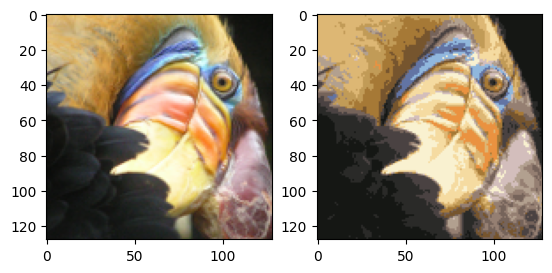

In [3]:
from skimage import io
from sklearn.cluster import KMeans#导入kmeans库

pic = io.imread('data/bird_small.png') / 255.
data = pic.reshape(128*128, 3)
model = KMeans(n_clusters=16, n_init=100)
model.fit(data)
centroids = model.cluster_centers_
print(centroids.shape)
C = model.predict(data)
print(C.shape)
compressed_pic = centroids[C].reshape((128,128,3))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)  # 左边为原来的结果
ax[1].imshow(compressed_pic)  # 右边为聚类后的结果
plt.show()

# 二、主成分分析 Principal component analysis

PCA是在数据集中找到“主成分”或最大方差方向的线性变换。 它可以用于降维。 在本练习中，我们首先负责实现PCA并将其应用于一个简单的二维数据集，以了解它是如何工作的。 我们从加载和可视化数据集开始。

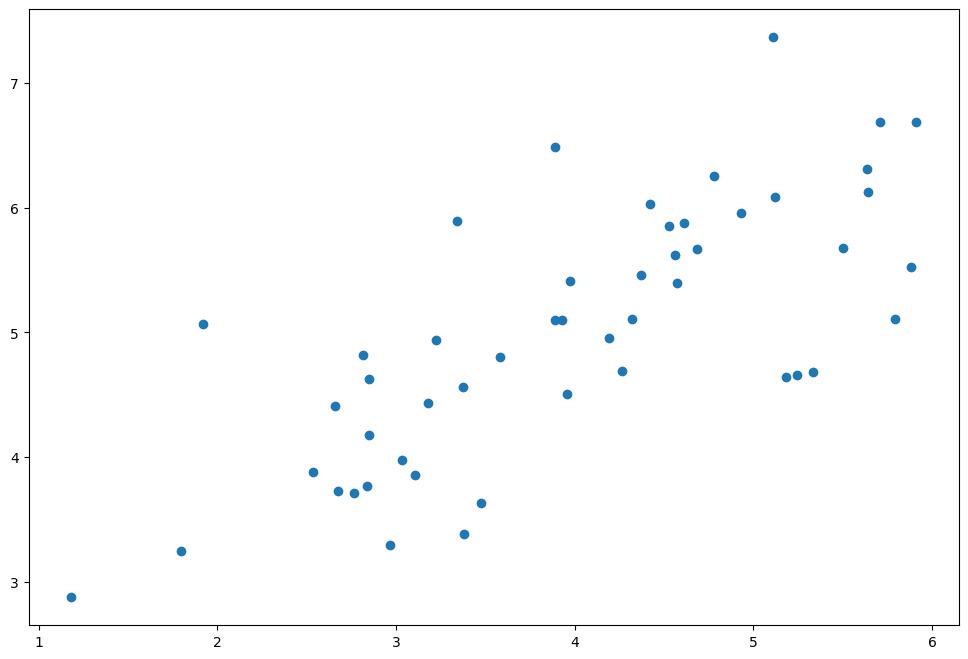

In [4]:
data = loadmat('data/ex7data1.mat')  
X = data['X']
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])
plt.show()

PCA的算法相当简单。 在确保数据被归一化之后，输出仅仅是原始数据的协方差矩阵的奇异值分解。

In [5]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

In [6]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

现在我们有主成分（矩阵U），我们可以用这些来将原始数据投影到一个较低维的空间中。 对于这个任务，我们将实现一个计算投影并且仅选择顶部K个分量的函数，有效地减少了维数。

In [7]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [8]:
Z = project_data(X, U, 1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

我们也可以通过反向转换步骤来恢复原始数据。

In [9]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [10]:
X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765],
        [5.57926356, 4.29474931],
        [3.93851354, 3.03174929],
        [6.94105849, 5.3430181 ],
        [4.93142811, 3.79606507],
        [5.58255993, 4.29728676],
        [5.48117436, 4.21924319],
        [5.38482148, 4.14507365],
        [5.02696267, 3.8696047 ],
        [5.54606249, 4.26919213],
        [3.60199795, 2.77270971],
        [6.58954104, 5.07243054],
        [5.681006  , 4.37306758],
        [4.02614513, 3.09920545],
        [6.76785875, 5.20969415],
        [5.50019161, 4.2338821 ],
        [6.81311151, 5.24452836],
        [4.56923815, 3.51726213],
        [6.49947125, 5.00309752],
        [4.94381398, 3.80559934],
        [3.47034372, 2.67136624],
        [4.41334883, 3.39726321],
        [5.97375815, 4.59841938],
        [6.10672889, 4.70077626],
        [4.09805306, 3.15455801],
        [4.907

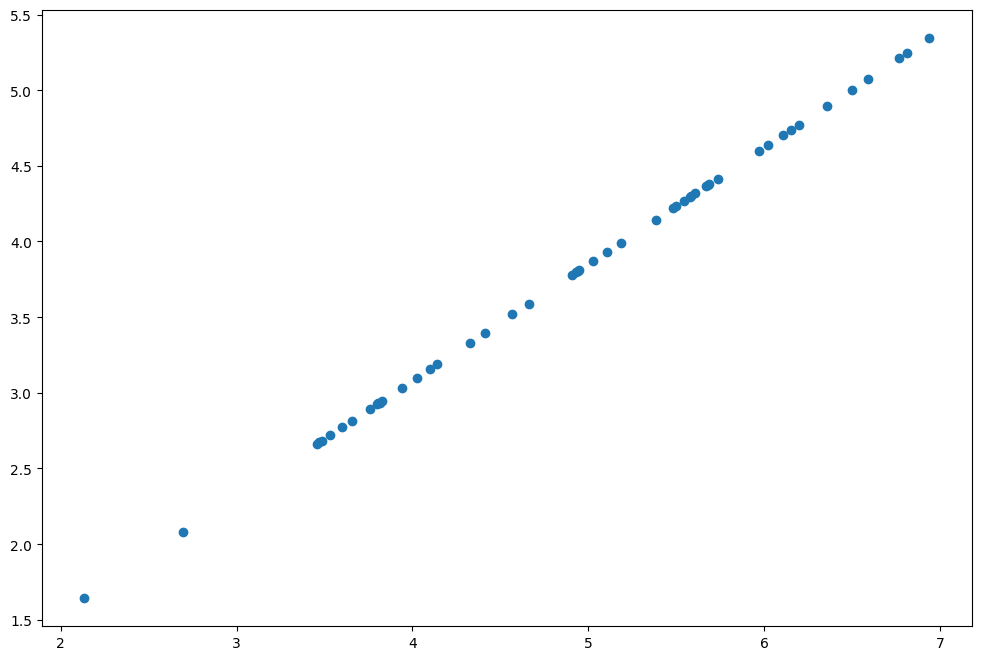

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:, 0]), list(X_recovered[:, 1]))
plt.show()

请注意，第一主成分的投影轴基本上是数据集中的对角线。 当我们将数据减少到一个维度时，我们失去了该对角线周围的变化，所以在我们的再现中，一切都沿着该对角线。

我们在此练习中的最后一个任务是将PCA应用于脸部图像。 通过使用相同的降维技术，我们可以使用比原始图像少得多的数据来捕获图像的“本质”。

In [12]:
faces = loadmat('data/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [13]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


练习代码包括一个将渲染数据集中的前100张脸的函数。 而不是尝试在这里重新生成，您可以在练习文本中查看他们的样子。 我们至少可以很容易地渲染一个图像。

In [14]:
face = np.reshape(X[3,:], (32, 32))

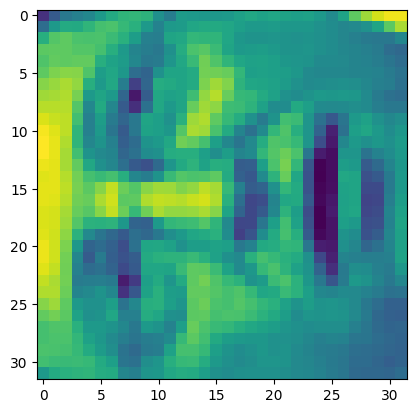

In [15]:
plt.imshow(face)
plt.show()

看起来很糟糕。 这些只有32 x 32灰度的图像（它也是侧面渲染，但我们现在可以忽略）。 我们的下一步是在面数据集上运行PCA，并取得前100个主要特征。

In [16]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

现在我们可以尝试恢复原来的结构并再次渲染。

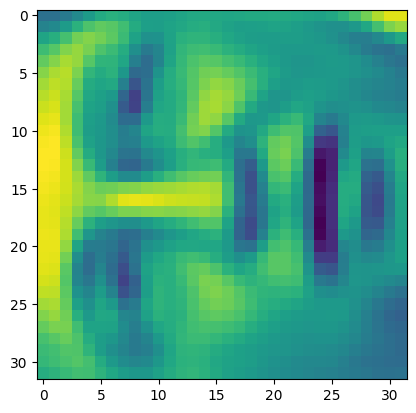

In [17]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)
plt.show()

请注意，我们失去了一些细节，尽管没有像您预期的维度数量减少10倍。